*Notebook created by Enric Millán Iglesias for the Bachelor's Thesis (TFG) at BSC (2025).*

**Note:** Upload the ```teacher_forcing_tuning.csv``` file before running

# Teacher Forcing Tuning

Tuning was performed on region 11 using the years 2014, 2013, 2012, 2011 for training, 2010 for validation, and 2009 for testing

## Loading experiment logs

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('teacher_forcing_tuning.csv')

# Display the shape and first few rows
print(f"Loaded {df.shape[0]} rows and {df.shape[1]} columns")
df.head()

Loaded 72 rows and 57 columns


,timestamp,model_name,model_path,region,start_year,end_year,train_years,test_years,model_type,cell_type,...,mae_clipped,r2_clipped,mse_corrected,rmse_corrected,mae_corrected,r2_corrected,bias_correction,train_losses,val_losses,training_curve_path
0,20250508_123430,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,rnn,...,0.16827,0.98198,0.09631,0.31034,0.17549,0.98232,0.04513,"0.75025,0.09490,0.09068,0.08856,0.08679,0.0853...","0.09913,0.09423,0.09201,0.09051,0.09227,0.0937...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
1,20250508_123408,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,rnn,...,0.17808,0.98090,0.10176,0.31900,0.18399,0.98120,0.04428,"1.02195,0.43521,0.38419,0.32900,0.27386,0.2285...","0.12138,0.10262,0.10012,0.10713,0.09363,0.1053...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
2,20250508_123440,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,rnn,...,0.17455,0.98004,0.10267,0.32043,0.17816,0.98096,0.07140,"0.66131,0.07686,0.07170,0.06881,0.06748,0.0662...","0.10120,0.09545,0.09102,0.09037,0.09428,0.0909...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
3,20250508_123510,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,rnn,...,0.18005,0.98042,0.10564,0.32502,0.18262,0.98044,0.01065,"0.50606,0.07854,0.07246,0.07010,0.06887,0.0673...","0.10615,0.10170,0.10967,0.09246,0.09323,0.0960...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...
4,20250508_123408,BackwardLAIPredictor,/gpfs/scratch/bsc32/ai4land/saved_data/Backwar...,W011,2009,2014,2010-2011-2012-2013-2014,2009,rnn,lstm,...,0.17329,0.98238,0.09395,0.30652,0.17660,0.98265,0.04310,"2.00586,0.32628,0.29902,0.28009,0.25589,0.2265...","0.12175,0.10272,0.09949,0.09859,0.09517,0.0926...",/gpfs/scratch/bsc32/ai4land/saved_data/trainin...


## Training time and best epoch for RNN (averaged)

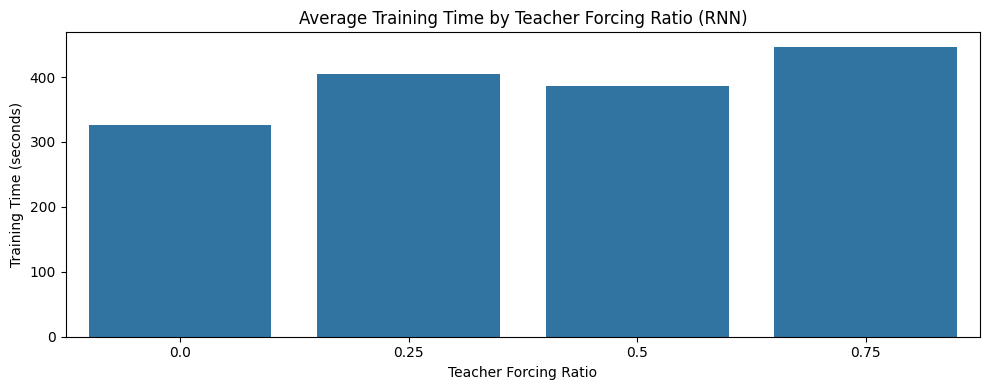

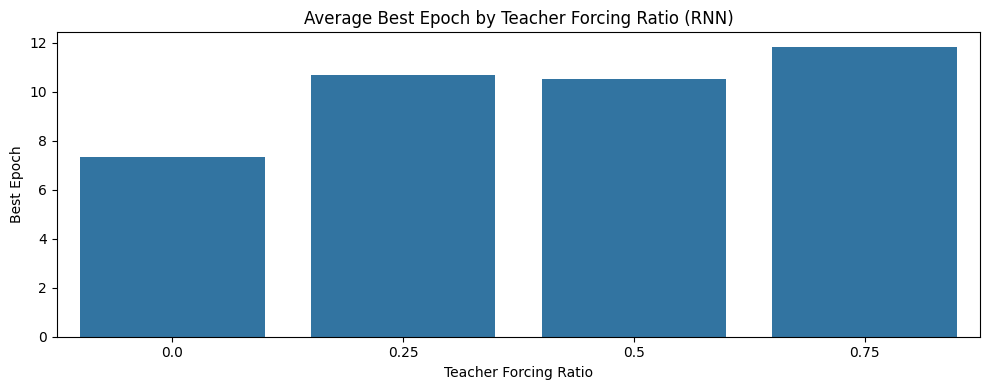

In [2]:
# Filter data for RNN
df_rnn = df[df['cell_type'] == 'rnn']

# Group by TF ratio and compute averages
avg_rnn = df_rnn.groupby('teacher_forcing_ratio')[['training_duration_sec', 'best_epoch']].mean().reset_index()

# Plot average training time
plt.figure(figsize=(10, 4))
sns.barplot(data=avg_rnn, x='teacher_forcing_ratio', y='training_duration_sec')
plt.title('Average Training Time by Teacher Forcing Ratio (RNN)')
plt.xlabel('Teacher Forcing Ratio')
plt.ylabel('Training Time (seconds)')
plt.tight_layout()
plt.show()

# Plot average best epoch
plt.figure(figsize=(10, 4))
sns.barplot(data=avg_rnn, x='teacher_forcing_ratio', y='best_epoch')
plt.title('Average Best Epoch by Teacher Forcing Ratio (RNN)')
plt.xlabel('Teacher Forcing Ratio')
plt.ylabel('Best Epoch')
plt.tight_layout()
plt.show()


## Training time and best epoch for LSTM (averaged)

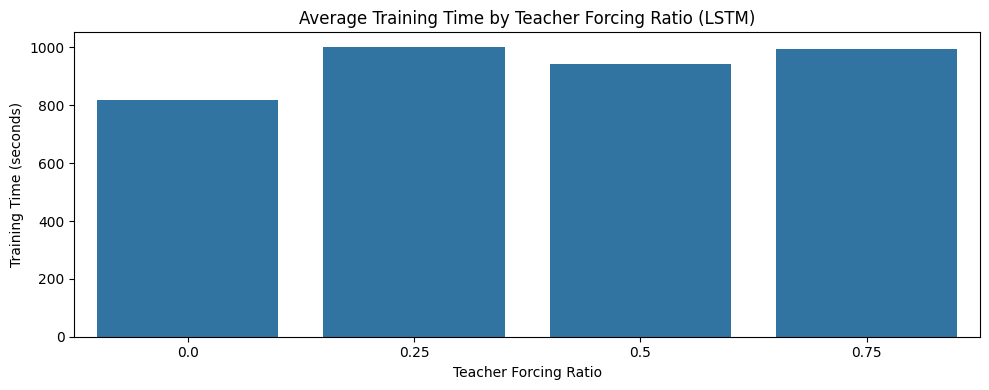

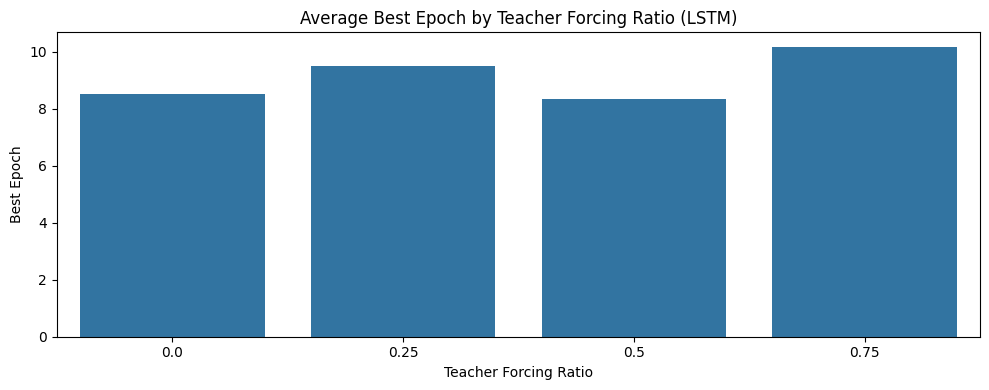

In [3]:
# Filter data for LSTM
df_lstm = df[df['cell_type'] == 'lstm']

# Group by TF ratio and compute averages
avg_lstm = df_lstm.groupby('teacher_forcing_ratio')[['training_duration_sec', 'best_epoch']].mean().reset_index()

# Plot average training time
plt.figure(figsize=(10, 4))
sns.barplot(data=avg_lstm, x='teacher_forcing_ratio', y='training_duration_sec')
plt.title('Average Training Time by Teacher Forcing Ratio (LSTM)')
plt.xlabel('Teacher Forcing Ratio')
plt.ylabel('Training Time (seconds)')
plt.tight_layout()
plt.show()

# Plot average best epoch
plt.figure(figsize=(10, 4))
sns.barplot(data=avg_lstm, x='teacher_forcing_ratio', y='best_epoch')
plt.title('Average Best Epoch by Teacher Forcing Ratio (LSTM)')
plt.xlabel('Teacher Forcing Ratio')
plt.ylabel('Best Epoch')
plt.tight_layout()
plt.show()


## Training time and best epoch for GRU

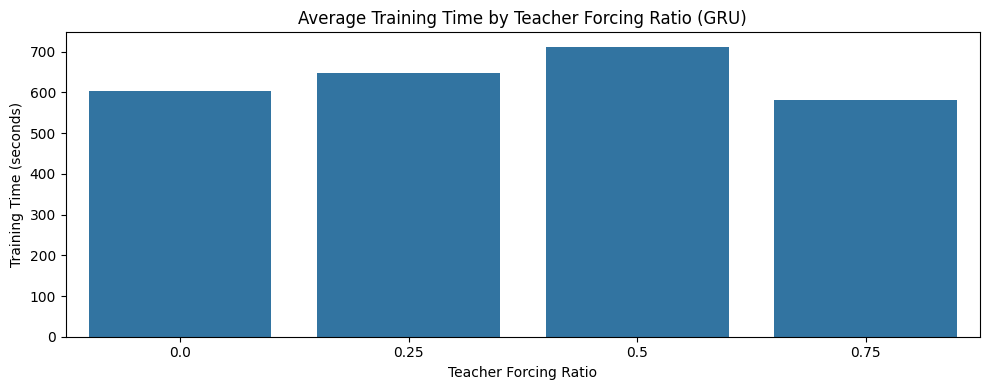

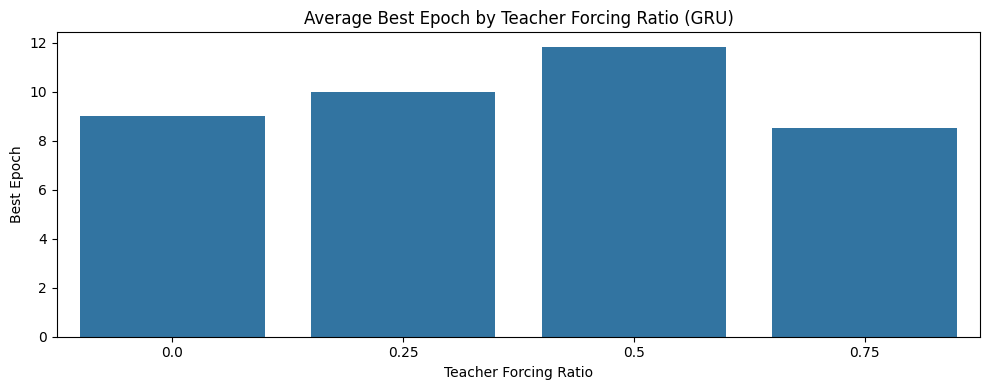

In [4]:
# Filter data for GRU
df_gru = df[df['cell_type'] == 'gru']

# Group by TF ratio and compute averages
avg_gru = df_gru.groupby('teacher_forcing_ratio')[['training_duration_sec', 'best_epoch']].mean().reset_index()

# Plot average training time
plt.figure(figsize=(10, 4))
sns.barplot(data=avg_gru, x='teacher_forcing_ratio', y='training_duration_sec')
plt.title('Average Training Time by Teacher Forcing Ratio (GRU)')
plt.xlabel('Teacher Forcing Ratio')
plt.ylabel('Training Time (seconds)')
plt.tight_layout()
plt.show()

# Plot average best epoch
plt.figure(figsize=(10, 4))
sns.barplot(data=avg_gru, x='teacher_forcing_ratio', y='best_epoch')
plt.title('Average Best Epoch by Teacher Forcing Ratio (GRU)')
plt.xlabel('Teacher Forcing Ratio')
plt.ylabel('Best Epoch')
plt.tight_layout()
plt.show()
